In [1]:
import matplotlib.pyplot as plt
import sys
import os
# Add the src directory to the path
sys.path.insert(0, os.path.abspath('../src'))
import dataloader
import pandas as pd
import numpy as np

%matplotlib widget
plot_flag = False

# Test of synchronization between the ET and EEG data

- Experiments were conducted for dyads  "W003" "W020" "W030" "W036" 
- For alignment test we use the comparison of blinks detecte by ET and the signal from Fp1 EEG channel. 
- To have a smooth EEG signal filter it bandpass between 1 and 10 Hz.

**The estimated delay is ~0.2s** which needs to be subtracted from time axis of ET signals.

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdown widget for dyad selection
dyad_selector = widgets.Dropdown(
    options=['W003', 'W020', 'W030', 'W036'],
    value='W036',
    description='Dyad ID:',
    disabled=False,
)

display(dyad_selector)

Dropdown(description='Dyad ID:', index=3, options=('W003', 'W020', 'W030', 'W036'), value='W036')

In [5]:
# creates a DataLoader class object that creates a structure described in the docs folder (data_structure_spec.md) from raw data

dyad_id = dyad_selector.value
lowcut=1.0
highcut=10.0
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=True, load_et=True, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Detected events: [{'name': 'Brave', 'start': 387.8056640625, 'duration': 59.3310546875}, {'name': 'Peppa', 'start': 248.509765625, 'duration': 59.6328125}, {'name': 'Incredibles', 'start': 318.359375, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 594.48828125, 'duration': 181.0556640625}, {'name': 'Talk_2', 'start': 836.7265625, 'duration': 181.056640625}]
Applying fir filters to EEG data.
Reseting the EEG time to the start of Peppa
ET time range: 241.59s to 461.89s
Reseting the ET time to the start of m2


Select caregiver or child data and zoom in to make sure the `delta` is OK.

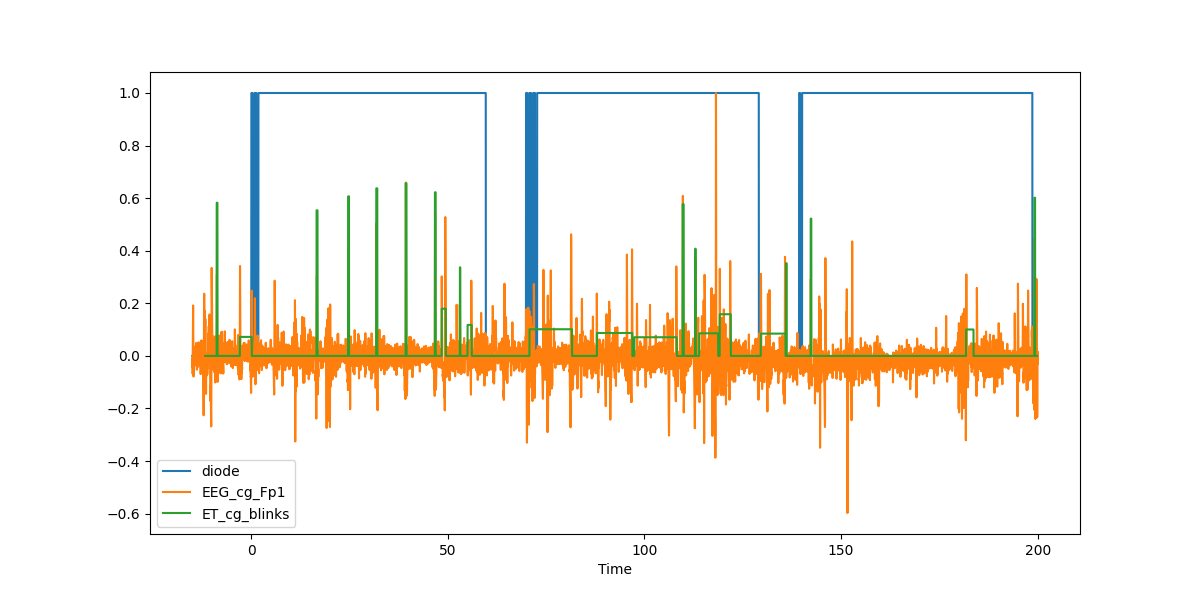

In [6]:
delta = 0.2  # to align ET with EEG (seconds): subtract from time axis of ET signals
who = 'cg' # choose 'cg' or 'ch' for caregiver or child data
data_selected = multimodal_data.data[(multimodal_data.data.time>-15)&(multimodal_data.data.time<200)]
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=1)

ax.plot(data_selected['time'], data_selected['diode'], linestyle='-', label='diode')
ax.plot(data_selected['time'], (data_selected[f'EEG_{who}_Fp1'])/np.max(data_selected[f'EEG_{who}_Fp1']), linestyle='-', label=f'EEG_{who}_Fp1')
ax.plot(data_selected['time']-delta, data_selected[f'ET_{who}_blinks'], linestyle='-', label=f'ET_{who}_blinks')

ax.legend()
plt.xlabel('Time')
plt.show()